# QOSF Mentorship Program Application Cohort 7
This project is the screaning task to apply to the QOSF mentorship program. (LINK)  
The task choosed was the Task 4 - Random Circuits.  

Here is the problem description:  

I worked on Qiskit (LINK) but if you follow the same concept and framework present here you can generalize to others programing languages.  

In [14]:
# First we import the required libraries.
import qiskit
from qiskit import QuantumCircuit, Aer
import numpy as np
import matplotlib.pyplot as plt

In [206]:
def choose_gates(quantum_circuit : qiskit.QuantumCircuit,
                  position : int, gates_set : list):
    """A function that choose the quantum gates given a specific gates set.

    Args:
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        position (int): initial position to put the quantum gate.
        gates_set (string list): list of standart quantum gates. 
        num_qubits (int): number of qubits.

    Returns:
        next_position (int): position for the next gate.
    
    """
    next_position = position                # specify the actual position.
    num_qubits = quantum_circuit.num_qubits # Number of qubits

    ran = np.random.randint(len(gates_set))  # define a random number to 
                                            # select from the gates_set

    if gates_set[ran] == "H":               # Is a Hadamard gate?
        quantum_circuit.h(position)         # Add the Hadamard gate to the quantum circuit.
        next_position += 1                  # increase the next position by 1
    elif gates_set[ran] == "RX":
        quantum_circuit.rx(np.pi/2, position)
        next_position += 1
    elif gates_set[ran] == "CNOT":          # Is a CNOT gate?
        if position+1 == num_qubits:        # Are we in the last qubit (no space for CNOT)?
            next_position += 1              # Apply identity.
        else:
            quantum_circuit.cnot(position, position+1)
            next_position += 2              # increase the next position by 2 (two qubit gate)
    elif gates_set[ran] == "RY":
        quantum_circuit.ry(np.pi/2, position)
        next_position += 1
    elif gates_set[ran] == "RZ":
        quantum_circuit.rz(np.pi/2, position)
        next_position += 1
    elif gates_set[ran] == "I":
        next_position += 1

    return next_position                    # return the next position for the next qubit.

In [210]:
def layer(quantum_circuit : qiskit.QuantumCircuit, gates_set : list, proportion : float):
    """ A function that create a layer of quantum random gates.

    Args:
        QuantumCircuit (qiskit.QuantumCircuit): The quantum circuit.
        gates_set (string list): list of standart quantum gates. 
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
    
    Returns:
        QuantumCircuit.depth() (int): quantum circuit currently depth.
        
    """

    actual_gates_set = gates_set.copy()
    actual_proportion = 0.0
    identity_gates = 0
    num_qubits = quantum_circuit.num_qubits

    while actual_proportion < proportion:
        actual_gates_set.append("I")
        identity_gates += 1
        actual_proportion = identity_gates/len(actual_gates_set)

    actual_proportion = 0.0
    position = 0

    while(position < num_qubits):
        position = choose_gates(quantum_circuit, position, actual_gates_set)
    quantum_circuit.barrier()

    return quantum_circuit.depth()

In [211]:
def random_circuit(qubits : int, depth : int, gates_set : list, proportion : float):
    """ A function that creates a random quantum circuit.

    Args: 
        qubits (int) : number of qubits.
        depth (int) : the desire depth of the circuit.
        gates_set (string list): list of standart quantum gates.
        proportion (float): density of identity gates with respect the others gates. ( >= 0 , < 1 )
    
        Returns:
        quantum_circuit (qiskit.QuantumCircuit) : the random quantum circuit.

    """

    quantum_circuit = QuantumCircuit(qubits)

    actual_depth = 0

    while (actual_depth < depth):
        actual_depth = layer(quantum_circuit, gates_set, proportion)

    return quantum_circuit

Random circuit depth: 7


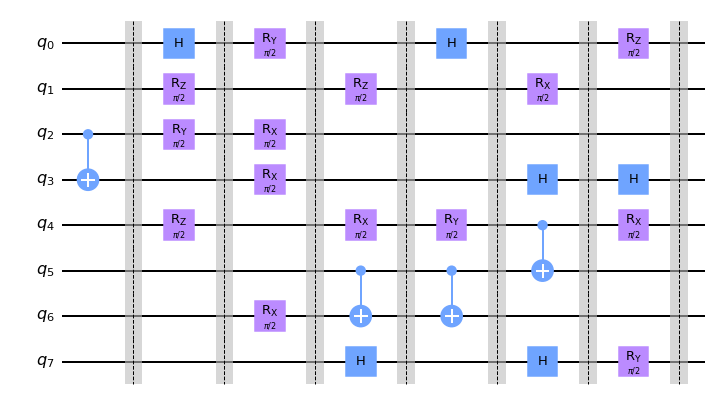

In [221]:
num_qubits = 8
circuit_depth = 7
gates_set = ["H","CNOT","RX","RY","RZ"]
proportion = 0.5

circuit = random_circuit(num_qubits, circuit_depth, gates_set, proportion)
print("Random circuit depth: {}".format(circuit.depth()))
circuit.draw('mpl')